In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import LabelEncoder

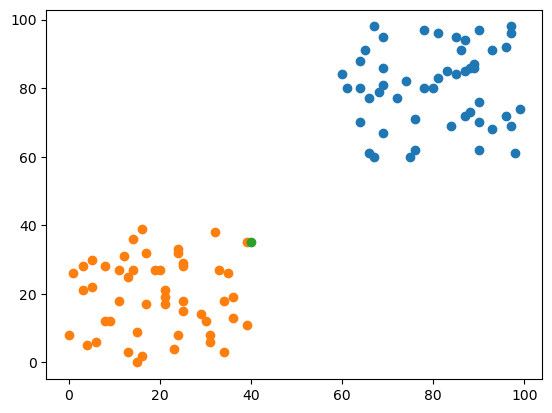

In [98]:
x = np.random.randint(0,40,50)
y = np.random.randint(0,40,50)
x1 = np.random.randint(60,100,50)
y1 = np.random.randint(60,100,50)
plt.scatter(x1,y1)
plt.scatter(x,y)
plt.scatter(40, 35)
plt.show()

In [63]:
x2 = np.hstack((x,x1))
y2 = np.hstack((y,y1))
d = {"x" : x2, "y" : y2}

df = pd.DataFrame(d)
df

,x,y
0,31,31
1,38,0
2,12,11
3,19,7
4,34,33
...,...,...
95,89,83
96,92,73
97,69,62
98,86,63


In [64]:
v = np.arange(0,100)
len(df)

100

In [65]:
df["target"] = v
df

,x,y,target
0,31,31,0
1,38,0,1
2,12,11,2
3,19,7,3
4,34,33,4
...,...,...,...
95,89,83,95
96,92,73,96
97,69,62,97
98,86,63,98


In [66]:
for i in range(100):

    if df["x"][i] > 50:
        df["target"][i] = 1
    else:
        df["target"][i] = 0

In [67]:
df["target"].value_counts()

target
0    50
1    50
Name: count, dtype: int64

In [68]:
X = df.drop("target",axis = 1).values.astype(float)
y = df["target"]

In [69]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [71]:
def distance(x1, x2):
    
    distance = np.sqrt(np.sum(x1 - x2)**2)
    
    return distance

class KNNmodel:
    
    def __init__(self, k = 3):
        
        self.k = k
    
    def fit(self, X_train, y_train):
        
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        
        prediction = [self.sup(x) for x in X_test]
        
        return prediction
        
    def sup(self, x_test):
        
        dis = [distance(x_test, x_train) for x_train in self.X_train]
        near = np.argsort(dis)[:self.k]
        labels = [self.y_train[i] for i in near]
        
        most_common = Counter(labels).most_common()
        
        return most_common[0][0]

In [72]:
model = KNNmodel()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [73]:
y_test == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_test,y_pred) * 100

100.0

In [77]:
xx = [40,50]
yy = [35,60]

In [95]:
c = {"x" : xx, "y" : yy}
new_y = pd.DataFrame(c)

one_new_y = new_y[:1].values.astype(float)
one_new_y

array([[40., 35.]])

In [97]:
model.predict(one_new_y)

[0]

# iris dataset

In [101]:
df = pd.read_csv("Iris (1).csv")
x = df.drop("Species", axis = 1).values.astype(float)
y = df["Species"]

In [102]:
le = LabelEncoder()
y = le.fit_transform(y)

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [104]:
model = KNNmodel(k = 3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [105]:
print(accuracy_score(y_test,y_pred) * 100,"%")

100.0 %
